<a href="https://colab.research.google.com/github/ousabu/aiousama/blob/master/Bank_customer_satisfiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [4]:
!git clone https://github.com/laxmimerit/Data-Files-for-Feature-Selection.git

Cloning into 'Data-Files-for-Feature-Selection'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 17 (delta 6), reused 10 (delta 2), pack-reused 0
Unpacking objects: 100% (17/17), done.


In [5]:
data=pd.read_csv('/content/Data-Files-for-Feature-Selection/santander-train.csv')

In [6]:
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [97]:
import seaborn as sns

In [101]:
data.corr()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,1.000000,-0.001025,-0.002135,-0.003111,-0.001436,-0.004131,-0.007277,-0.006302,-0.006700,-0.006698,-0.008326,0.000596,-0.002515,-0.001869,-0.002927,-0.000303,-0.002239,-0.003173,-0.001409,-0.006793,-0.001022,-0.007269,NaN,NaN,0.002002,0.003493,-0.007909,-0.007154,-0.003050,-0.003880,-0.002967,-0.006262,0.000466,0.000439,-0.000157,0.000632,0.000228,0.000947,0.000947,-0.000055,...,-0.002364,-0.001904,0.000839,-0.006679,-0.001095,-0.001325,-0.006825,-0.006099,-0.005683,-0.005480,-0.002670,0.000061,-0.001763,-0.001883,0.003373,0.000935,0.002975,0.003911,0.000066,NaN,-0.001746,-0.001336,-0.003024,-0.003714,-0.002258,-0.002629,0.000693,0.000137,-0.005999,-0.007631,0.001986,0.003771,-0.001521,-0.001216,-0.003772,-0.003674,-0.000856,0.000297,-0.005687,0.003148
var3,-0.001025,1.000000,-0.004452,0.001868,0.005989,0.006817,0.001518,0.001690,0.000530,0.000611,0.001311,0.005916,0.006764,0.001676,0.002459,0.003993,0.001695,0.002474,0.004084,0.000460,0.001069,0.002424,NaN,NaN,-0.008234,0.038505,0.000401,0.000200,0.007205,0.006711,0.010520,0.008533,0.009187,0.008278,0.008129,0.003986,0.003952,0.000200,0.000200,0.009058,...,0.003423,0.004099,0.001541,0.000716,0.002211,0.002225,0.004144,0.002590,0.004831,0.004851,0.005397,0.003027,0.005948,0.005896,0.002324,0.001381,0.002353,0.002381,0.000198,NaN,0.000176,0.000183,0.000234,0.000166,0.000347,0.000331,0.000199,0.000143,0.000191,0.000229,0.000716,0.000491,0.000638,0.000669,0.000617,0.000508,0.000738,0.000778,0.000071,0.004475
var15,-0.002135,-0.004452,1.000000,0.043722,0.094762,0.101177,0.042754,0.048512,0.008805,0.009678,0.035884,0.088145,0.093354,0.085281,0.074686,0.104643,0.085215,0.074783,0.107229,0.013525,0.106042,0.054182,NaN,NaN,-0.112228,-0.098936,0.010521,0.010605,0.111776,0.101437,0.262891,0.219815,0.300081,0.243894,0.241273,0.186658,0.186964,0.003083,0.003083,0.298543,...,0.132090,0.167988,0.042061,0.018036,0.054037,0.057478,0.163108,0.109747,0.185961,0.186720,0.188661,0.106964,0.210294,0.207802,0.122017,0.072549,0.121317,0.122041,0.002854,NaN,0.002151,0.002339,0.015796,0.011859,0.020383,0.019886,0.007891,-0.002859,0.010679,0.011623,0.029358,0.017264,0.028504,0.029176,0.029180,0.018884,0.032833,0.033597,0.006497,0.101322
imp_ent_var16_ult1,-0.003111,0.001868,0.043722,1.000000,0.041221,0.034879,0.009896,0.009377,0.000592,0.002510,0.011502,0.040879,0.034387,0.020975,0.015883,0.035100,0.020869,0.015921

In [7]:
data.shape

(76020, 371)

In [10]:
x=data.drop(['ID','TARGET'],axis='columns')

In [11]:
y=data.TARGET

In [14]:
y.value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=777,stratify=y)

In [17]:
x_train.shape,y_train.shape

((60816, 369), (60816,))

In [18]:
vt=VarianceThreshold(0.01)

In [19]:
x_train=vt.fit_transform(x_train)

In [20]:
x_test=vt.transform(x_test)

In [21]:
x_train.shape,x_test.shape

((60816, 270), (15204, 270))

In [22]:
x_train_t=x_train.T

In [23]:
x_test_t=x_test.T

In [25]:
x_train_t=pd.DataFrame(x_train_t)
x_test_t=pd.DataFrame(x_test_t)

In [27]:
x_train_t.duplicated().sum()

17

In [28]:
duplicater_features=x_train_t.duplicated()

In [30]:
type(duplicater_features)

pandas.core.series.Series

In [31]:
duplicater_features[70:80]

70     True
71    False
72     True
73    False
74    False
75    False
76    False
77    False
78    False
79    False
dtype: bool

In [32]:
feature_to_keep=[not index for index in duplicater_features]

In [ ]:
feature_to_keep

In [36]:
x_train=x_train_t[feature_to_keep].T

In [37]:
x_train.shape

(60816, 253)

In [40]:
x_test=x_test_t[feature_to_keep].T

In [41]:
x_test.shape

(15204, 253)

In [42]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,39,40,41,...,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269
0,2.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181295.370000
1,2.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,3.00,0.09,3.0,2.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97159.410000
2,2.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,21.0,115.86,23.28,12.0,50.37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
3,2.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,280766.880000
4,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,9.0,90.00,2.91,90.0,60.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,168563.880000


In [43]:
scaler=StandardScaler()

In [44]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [82]:
x_train.shape, x_test.shape

((60816, 253, 1), (15204, 253))

In [52]:
y_train=y_train.to_numpy()

In [53]:
y_test=y_test.to_numpy()

In [83]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [84]:
model=Sequential()

In [85]:
model.add(Conv1D(32,kernel_size=3,activation='relu',input_shape=(x_train.shape[1],1)))

In [86]:
model.add(BatchNormalization())

In [87]:
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

In [88]:
model.add(Conv1D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

In [89]:
model.add(Conv1D(128,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

In [90]:
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))


In [91]:
model.add(Dense(1,activation='sigmoid'))

In [92]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 251, 32)           128       
_________________________________________________________________
batch_normalization_8 (Batch (None, 251, 32)           128       
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 125, 32)           0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 125, 32)           0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 123, 64)           6208      
_________________________________________________________________
batch_normalization_9 (Batch (None, 123, 64)           256       
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 61, 64)           

In [93]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [96]:
history=model.fit(x_train,y_train,batch_size=100,epochs=5,validation_data=(x_test,y_test),verbose=1)

Epoch 1/5
609/609 [==============================] - 87s 143ms/step - loss: 0.1500 - accuracy: 0.9604 - val_loss: 0.1470 - val_accuracy: 0.9600
Epoch 2/5
609/609 [==============================] - 83s 137ms/step - loss: 0.1499 - accuracy: 0.9604 - val_loss: 0.1440 - val_accuracy: 0.9604
Epoch 3/5
609/609 [==============================] - 91s 149ms/step - loss: 0.1479 - accuracy: 0.9604 - val_loss: 0.1458 - val_accuracy: 0.9604
Epoch 4/5
609/609 [==============================] - 87s 144ms/step - loss: 0.1468 - accuracy: 0.9604 - val_loss: 0.1429 - val_accuracy: 0.9604
Epoch 5/5
609/609 [==============================] - 86s 141ms/step - loss: 0.1468 - accuracy: 0.9604 - val_loss: 0.1430 - val_accuracy: 0.9604


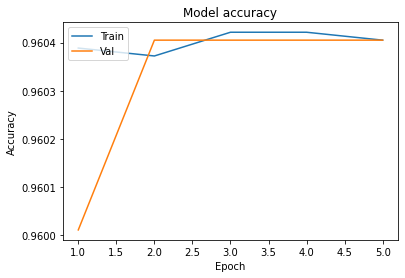

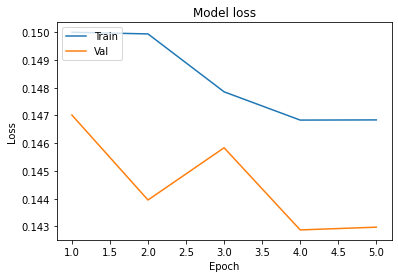

In [100]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

plot_learningCurve(history, 5)